**DATA CLEANING**

**Introduction**

This bit is going to advise stakeholders on the best movie genres to venture into based on the worldwide gross figures for the movies.\
The first data set will be derived from the movie_budgets csv where we shall get details of the worldwide gross for the movies.\
Secondly, the movie_info tsv file will be analyzed to establish the genres of these top 10 paying movies.

**MOVIE BUDGETS**

Brief check on what the file "tn.movie_budgets" entails.\
Note: It is a zipped csv file.

In [46]:
import gzip
import pandas as pd

csv_path_budget = r'C:\Users\admin\Documents\MoringaProjects\Phase2\Group3Project\Group3-End-of-Phase2-Project\zippedData\tn.movie_budgets.csv.gz'

# Read the gzipped CSV file directly into a DataFrame
with gzip.open(csv_path_budget, 'rt') as f:
    df = pd.read_csv(f)

# Now you can use the DataFrame
print(df.head())

   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747  


The above code shows that the file has a table entailing the following columns: id, release_date, movie, production_budget, domestic_gross, and worldwide_gross.

***Filtering through the data:***

a). Start with establishing relevant columns for our analysis.
    i.e: id, movie, production_budget, worldwide_gross.

In [49]:
import gzip
import pandas as pd

csv_path_budget = r'C:\Users\admin\Documents\MoringaProjects\Phase2\Group3Project\Group3-End-of-Phase2-Project\zippedData\tn.movie_budgets.csv.gz'

# Specify the columns you want to load
columns_to_use = ['id', 'movie', 'production_budget', 'worldwide_gross']

# Read only the specified columns
with gzip.open(csv_path_budget, 'rt') as f:
    df = pd.read_csv(f, usecols=columns_to_use)

# Show the selected data
print(df.head())


   id                                        movie production_budget  \
0   1                                       Avatar      $425,000,000   
1   2  Pirates of the Caribbean: On Stranger Tides      $410,600,000   
2   3                                 Dark Phoenix      $350,000,000   
3   4                      Avengers: Age of Ultron      $330,600,000   
4   5            Star Wars Ep. VIII: The Last Jedi      $317,000,000   

  worldwide_gross  
0  $2,776,345,279  
1  $1,045,663,875  
2    $149,762,350  
3  $1,403,013,963  
4  $1,316,721,747  


b). Getting the top 10 movies based on worldwide gross:

In [44]:
import pandas as pd
import gzip

csv_path_budget = r'C:\Users\admin\Documents\MoringaProjects\Phase2\Group3Project\Group3-End-of-Phase2-Project\zippedData\tn.movie_budgets.csv.gz'

# Specify the columns you want to load
columns_to_use = ['id', 'movie', 'worldwide_gross']

# Read only the specified columns
with gzip.open(csv_path_budget, 'rt') as f:
    df = pd.read_csv(f, usecols=columns_to_use)

# Remove dollar signs and commas, then convert to integers
df['worldwide_gross'] = df['worldwide_gross'].replace(r'[\$,]', '', regex=True).astype('int64')

# Sort by worldwide_gross in descending order
df_sorted = df.sort_values(by='worldwide_gross', ascending=False)

# Show the top 10
print(df_sorted.head(10))


     id                                          movie  worldwide_gross
0     1                                         Avatar       2776345279
42   43                                        Titanic       2208208395
5     6           Star Wars Ep. VII: The Force Awakens       2053311220
6     7                         Avengers: Infinity War       2048134200
33   34                                 Jurassic World       1648854864
66   67                                      Furious 7       1518722794
26   27                                   The Avengers       1517935897
3     4                        Avengers: Age of Ultron       1403013963
41   42                                  Black Panther       1348258224
260  61  Harry Potter and the Deathly Hallows: Part II       1341693157


**Graphical Presentation of the tope 10 movies**

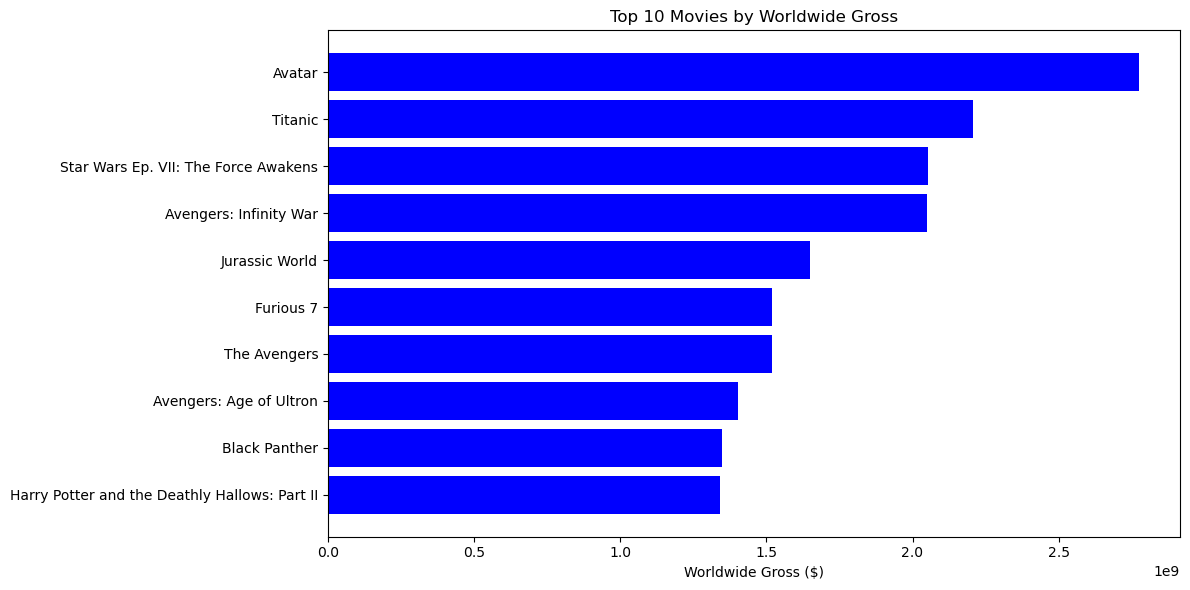

In [64]:
import pandas as pd
import gzip
import matplotlib.pyplot as plt

csv_path_budget = r'C:\Users\admin\Documents\MoringaProjects\Phase2\Group3Project\Group3-End-of-Phase2-Project\zippedData\tn.movie_budgets.csv.gz'

# Columns to use
columns_to_use = ['id', 'movie', 'worldwide_gross']

# Read and clean data
with gzip.open(csv_path_budget, 'rt') as f:
    df = pd.read_csv(f, usecols=columns_to_use)

df['worldwide_gross'] = df['worldwide_gross'].replace(r'[\$,]', '', regex=True).astype('int64')

# Sort and select top 10
df_sorted = df.sort_values(by='worldwide_gross', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(df_sorted['movie'], df_sorted['worldwide_gross'], color='blue')
plt.xlabel('Worldwide Gross ($)')
plt.title('Top 10 Movies by Worldwide Gross')
plt.gca().invert_yaxis()  # Highest grossing movie on top
plt.tight_layout()
plt.show()


**MOVIE INFO**

Brief check into what the file rt.movie_info entails.\
Note: It is a zipped tsv file

In [50]:
import gzip
import pandas as pd

tsv_path_info = r'C:\Users\admin\Documents\MoringaProjects\Phase2\Group3Project\Group3-End-of-Phase2-Project\zippedData\rt.movie_info.tsv.gz'

# Read the gzipped TSV file directly into a DataFrame

with gzip.open(tsv_path_info, 'rt', encoding='utf-8', errors='replace') as f:
    df = pd.read_csv(f, sep='\t')


# Now you can use the DataFrame
print(df.head())

   id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   
4   7                                                NaN     NR   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Musical and Performing Arts    Allison Anders   
3           Drama|Mystery and Suspense    Barry Levinson   
4                        Drama|Romance    Rodney Bennett   

                            writer  theater_date      dvd_date currency  \
0                   Ernest Tidyman   Oct 9, 1971  Sep 25, 2001      NaN   
1     David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $   
2          

***Filtering through the data:***

a). Start with establishing relevant columns for our analysis.
    i.e: id, genre, studio.

In [55]:
import gzip
import pandas as pd

tsv_path_info = r'C:\Users\admin\Documents\MoringaProjects\Phase2\Group3Project\Group3-End-of-Phase2-Project\zippedData\rt.movie_info.tsv.gz'

columns_to_use = ['id', 'genre', 'studio']

with gzip.open(tsv_path_info, 'rt', encoding='utf-8', errors='replace') as f:
    df = pd.read_csv(f, sep='\t', usecols=columns_to_use)

print(df.head())


   id                                genre             studio
0   1  Action and Adventure|Classics|Drama                NaN
1   3    Drama|Science Fiction and Fantasy  Entertainment One
2   5    Drama|Musical and Performing Arts                NaN
3   6           Drama|Mystery and Suspense                NaN
4   7                        Drama|Romance                NaN


b). Getting genres of the top 10 movies based on worldwide gross:

**N/B**: the IDs of the top 10 movies as extracted from the budgets file earlier are the following starting with the highest:\
1 , 43, 6 , 7 , 34 , 67 , 27 , 4 , 42 , 61 .

In [59]:
import gzip
import pandas as pd

tsv_path_info = r'C:\Users\admin\Documents\MoringaProjects\Phase2\Group3Project\Group3-End-of-Phase2-Project\zippedData\rt.movie_info.tsv.gz'

columns_to_use = ['id', 'genre', 'studio']
target_ids = [1, 43, 6, 7, 34, 67, 27, 4, 42, 61]  # the movie IDs needed

with gzip.open(tsv_path_info, 'rt', encoding='utf-8', errors='replace') as f:
    df = pd.read_csv(f, sep='\t', usecols=columns_to_use)

# Filter the DataFrame for rows with the specified IDs
filtered_df = df[df['id'].isin(target_ids)]

print(filtered_df)


    id                                              genre              studio
0    1                Action and Adventure|Classics|Drama                 NaN
3    6                         Drama|Mystery and Suspense                 NaN
4    7                                      Drama|Romance                 NaN
20  27                        Musical and Performing Arts                 NaN
24  34          Action and Adventure|Mystery and Suspense  Paramount Pictures
30  42  Action and Adventure|Classics|Drama|Mystery an...                 NaN
31  43        Classics|Comedy|Musical and Performing Arts                 NaN
48  61  Action and Adventure|Drama|Horror|Mystery and ...     New Line Cinema
53  67                                             Horror    20th Century Fox


Presenting in a graph

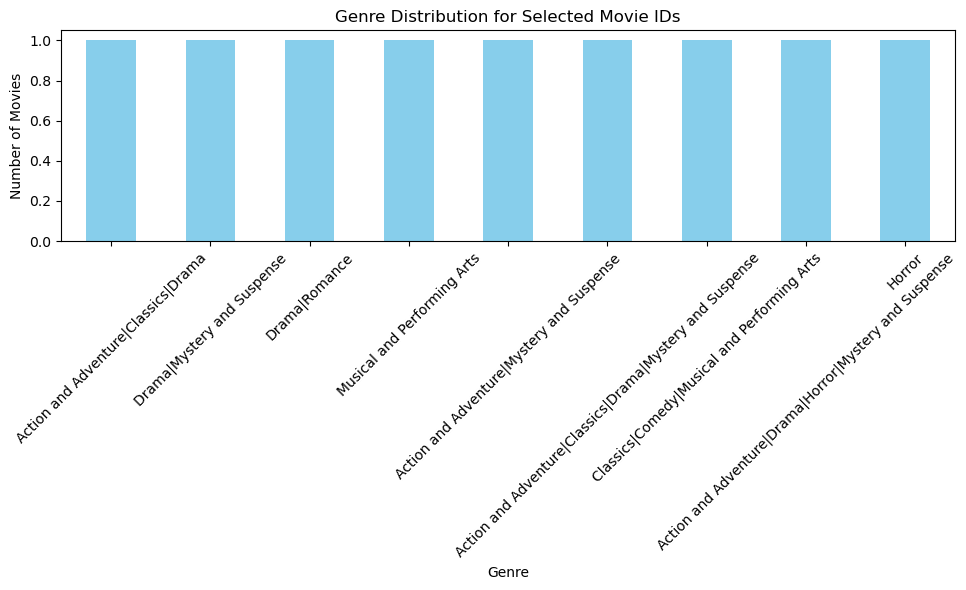

In [65]:
import pandas as pd
import gzip
import pandas as pd
import matplotlib.pyplot as plt

# File path
tsv_path_info = r'C:\Users\admin\Documents\MoringaProjects\Phase2\Group3Project\Group3-End-of-Phase2-Project\zippedData\rt.movie_info.tsv.gz'

# Columns and IDs to filter
columns_to_use = ['id', 'genre', 'studio']
target_ids = [1, 43, 6, 7, 34, 67, 27, 4, 42, 61]

# Load and filter data
with gzip.open(tsv_path_info, 'rt', encoding='utf-8', errors='replace') as f:
    df = pd.read_csv(f, sep='\t', usecols=columns_to_use)

filtered_df = df[df['id'].isin(target_ids)]

# Plot genre distribution
plt.figure(figsize=(10, 6))
filtered_df['genre'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Genre Distribution for Selected Movie IDs')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Conclusion**

A quick check on the analysis returned about the genres of the top 10 movies based on worldwide gross establishes that:\
Drama leads, apearing 5 times.\
Action and adventure is second apearing 4 times. Mystery and Suspense also appears 4 times.\
Other genres appearing at the top are classics, comedy and horror.